In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline



In [2]:
data_set = pd.read_csv("Salary_Data.csv")
data_set.head(7)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [3]:
data_set.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Salary'>

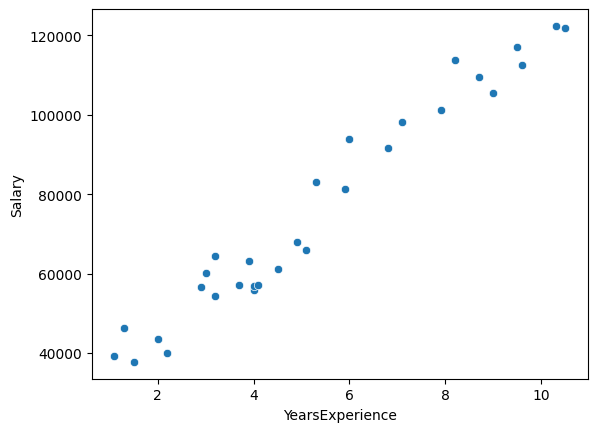

In [5]:
sns.scatterplot(data=data_set,x="YearsExperience", y="Salary")

<Axes: xlabel='YearsExperience', ylabel='Count'>

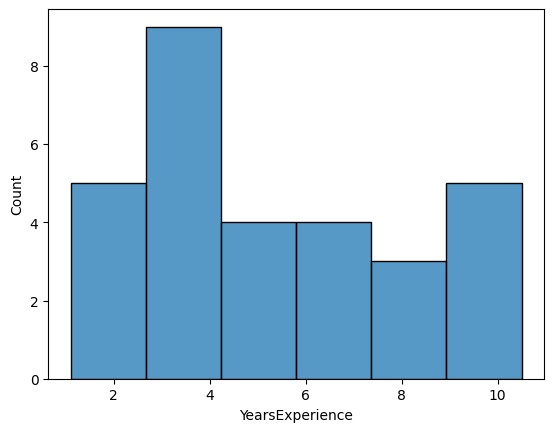

In [28]:
sns.histplot(data_set['YearsExperience'])

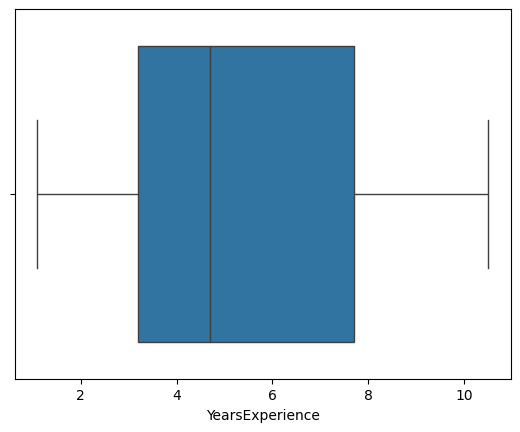

In [9]:
ax = sns.boxplot(x=data_set['YearsExperience'])

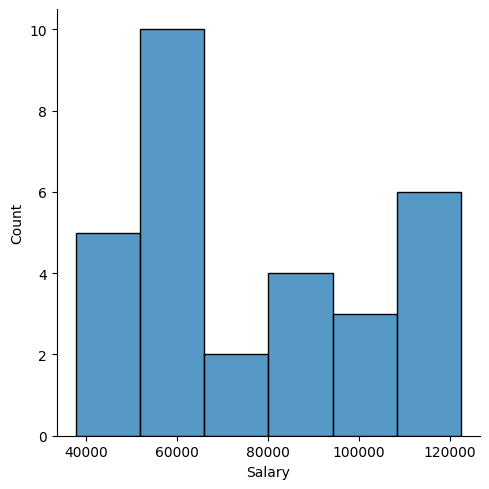

In [10]:
sns.displot(data=data_set['Salary'])

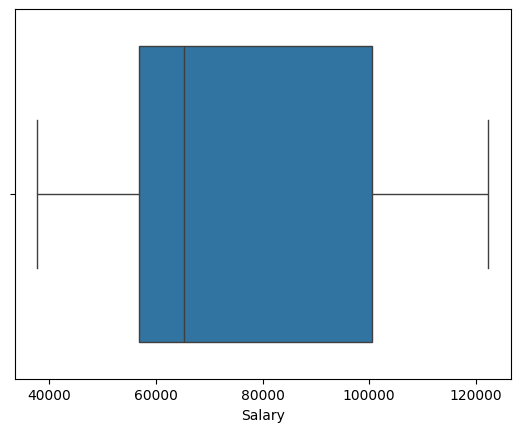

In [11]:
ax = sns.boxplot(x=data_set['Salary'])

<Axes: >

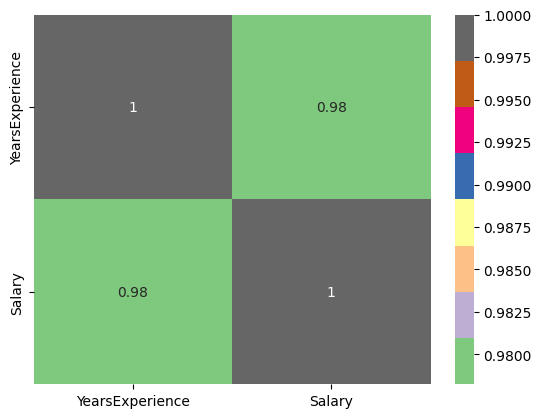

In [12]:
corr_data = data_set.corr()
sns.heatmap(corr_data,annot=True, cmap='Accent')

In [13]:
data_set.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
x = data_set.drop(columns='Salary')
y = data_set.drop(columns='YearsExperience')

In [15]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)



In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.988169515729126


In [23]:
model.predict([[29]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[296844.77782577]])

In [31]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
data.shape

(50, 5)

In [33]:
data.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
data.corr()

<ipython-input-35-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [36]:
np.unique(data['State'])

array(['California', 'Florida', 'New York'], dtype=object)

In [37]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

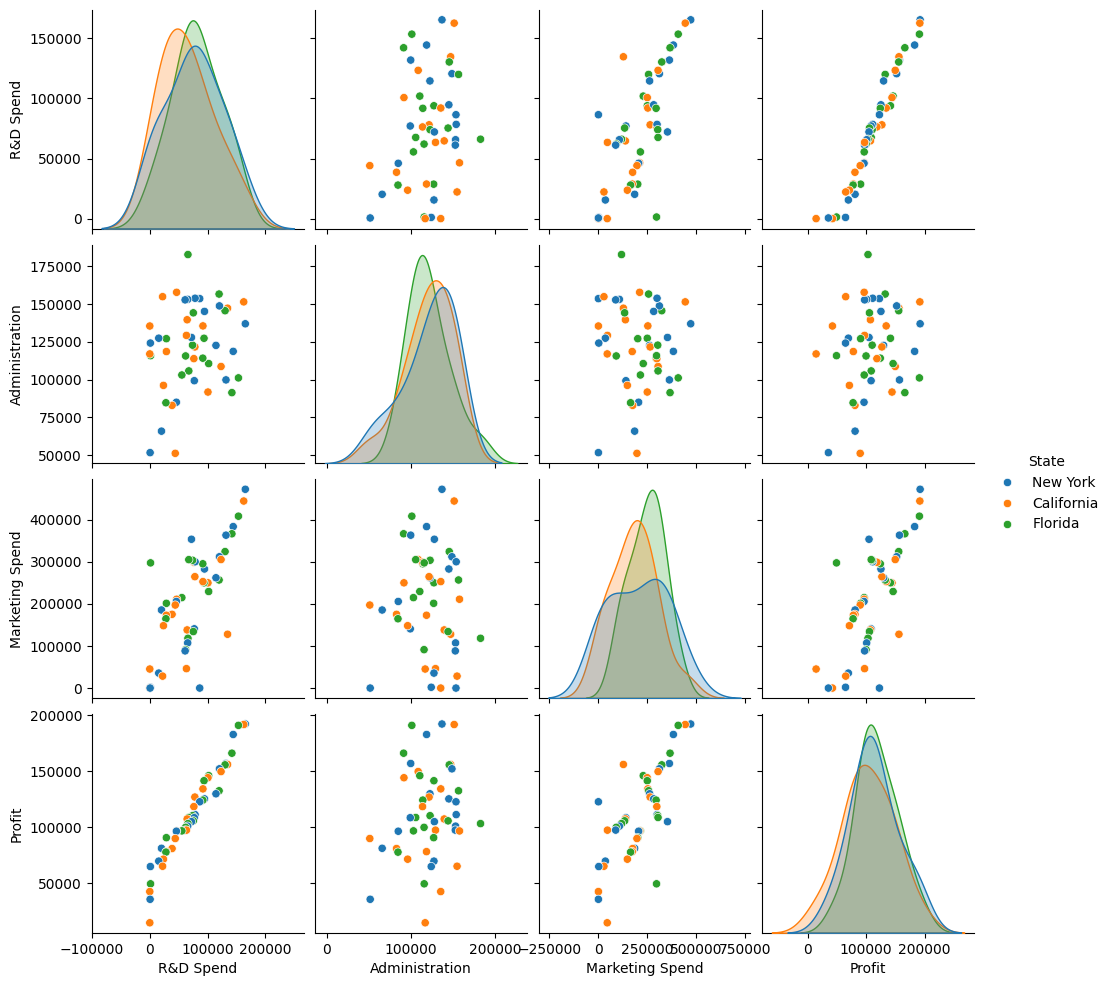

In [38]:
sns.pairplot(data, hue= 'State')

In [40]:
data = pd.get_dummies(data, drop_first= True)

In [41]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [42]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


In [44]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
State_Florida        uint8
State_New York       uint8
dtype: object

In [45]:
data['State_Florida'] = data['State_Florida'].astype(int)
data['State_New York'] = data['State_New York'].astype(int)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = data.drop(columns='Profit')

vif_data = pd.DataFrame()
vif_data['feature'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values,1)for i in range(len(x.columns))]

print(vif_data)

           feature       VIF
0        R&D Spend  4.950277
1   Administration  4.950277
2  Marketing Spend  4.950277
3    State_Florida  4.950277
4   State_New York  4.950277


In [53]:
x = data.drop(columns='Profit')
y = data['Profit']


In [54]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [55]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=4)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [66]:
model.coef_


array([ 8.11926545e-01, -6.28010690e-02,  2.12403180e-02,  1.47927614e+03,
        1.97283428e+03])

In [67]:
model.intercept_

54275.73000782885

In [68]:
pre = model.predict(x_test)
pre

array([157042.09479915,  53439.14393789, 135554.07187912, 173173.76053316,
       129276.28955414,  98170.75350783, 159287.31697045, 100945.00686233,
        76575.49158138, 129342.40840291])

In [69]:
y_test

6     156122.51
48     35673.41
11    144259.40
4     166187.94
12    141585.52
31     97483.56
7     155752.60
25    107404.34
41     77798.83
18    124266.90
Name: Profit, dtype: float64

In [71]:
mean_squared_error(y_test, pre)

67451530.49341059

In [72]:
r2_score(y_test, pre)

0.9560357304852378